In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn import metrics

In [3]:
#Read the data file:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/colon.csv')
data.head()

,id,study,rx,sex,age,obstruct,perfor,adhere,nodes,status,differ,extent,surg,node4,time
0,1,1,3,1,43,0,0,0,5.0,1,2.0,3,0,1,1521
1,2,1,3,1,63,0,0,0,1.0,0,2.0,3,0,0,3087
2,3,1,1,0,71,0,0,1,7.0,1,2.0,2,0,1,963
3,4,1,3,0,66,1,0,0,6.0,1,2.0,3,1,1,293
4,5,1,1,1,69,0,0,0,22.0,1,2.0,3,1,1,659


In [4]:
data= data.rename(columns=str.upper)
data.head(15)

,ID,STUDY,RX,SEX,AGE,OBSTRUCT,PERFOR,ADHERE,NODES,STATUS,DIFFER,EXTENT,SURG,NODE4,TIME
0,1,1,3,1,43,0,0,0,5.0,1,2.0,3,0,1,1521
1,2,1,3,1,63,0,0,0,1.0,0,2.0,3,0,0,3087
2,3,1,1,0,71,0,0,1,7.0,1,2.0,2,0,1,963
3,4,1,3,0,66,1,0,0,6.0,1,2.0,3,1,1,293
4,5,1,1,1,69,0,0,0,22.0,1,2.0,3,1,1,659
5,6,1,3,0,57,0,0,0,9.0,1,2.0,3,0,1,1767
6,7,1,2,1,77,0,0,0,5.0,1,2.0,3,1,1,420
7,8,1,1,1,54,0,0,0,1.0,0,2.0,3,0,0,3192
8,9,1,2,1,46,0,0,1,2.0,0,2.0,3,0,0,3173
9,10,1,3,0,68,0,0,0,1.0,0,2.0,3,1,0,3308


In [5]:
# Checking for columns having null values
data.isna().sum()

ID           0
STUDY        0
RX           0
SEX          0
AGE          0
OBSTRUCT     0
PERFOR       0
ADHERE       0
NODES       18
STATUS       0
DIFFER      23
EXTENT       0
SURG         0
NODE4        0
TIME         0
dtype: int64

In [6]:
data=data.dropna()

In [7]:
data.isna().sum()

ID          0
STUDY       0
RX          0
SEX         0
AGE         0
OBSTRUCT    0
PERFOR      0
ADHERE      0
NODES       0
STATUS      0
DIFFER      0
EXTENT      0
SURG        0
NODE4       0
TIME        0
dtype: int64

In [8]:
data.shape

(888, 15)

In [9]:
data.head(5)

,ID,STUDY,RX,SEX,AGE,OBSTRUCT,PERFOR,ADHERE,NODES,STATUS,DIFFER,EXTENT,SURG,NODE4,TIME
0,1,1,3,1,43,0,0,0,5.0,1,2.0,3,0,1,1521
1,2,1,3,1,63,0,0,0,1.0,0,2.0,3,0,0,3087
2,3,1,1,0,71,0,0,1,7.0,1,2.0,2,0,1,963
3,4,1,3,0,66,1,0,0,6.0,1,2.0,3,1,1,293
4,5,1,1,1,69,0,0,0,22.0,1,2.0,3,1,1,659


In [10]:
data1= data[['RX', 'SEX', 'AGE', 'OBSTRUCT','PERFOR','ADHERE','NODES','DIFFER','EXTENT','SURG','NODE4','TIME','STATUS']]
data1.head(5)

,RX,SEX,AGE,OBSTRUCT,PERFOR,ADHERE,NODES,DIFFER,EXTENT,SURG,NODE4,TIME,STATUS
0,3,1,43,0,0,0,5.0,2.0,3,0,1,1521,1
1,3,1,63,0,0,0,1.0,2.0,3,0,0,3087,0
2,1,0,71,0,0,1,7.0,2.0,2,0,1,963,1
3,3,0,66,1,0,0,6.0,2.0,3,1,1,293,1
4,1,1,69,0,0,0,22.0,2.0,3,1,1,659,1


In [11]:
data.head(5)

,ID,STUDY,RX,SEX,AGE,OBSTRUCT,PERFOR,ADHERE,NODES,STATUS,DIFFER,EXTENT,SURG,NODE4,TIME
0,1,1,3,1,43,0,0,0,5.0,1,2.0,3,0,1,1521
1,2,1,3,1,63,0,0,0,1.0,0,2.0,3,0,0,3087
2,3,1,1,0,71,0,0,1,7.0,1,2.0,2,0,1,963
3,4,1,3,0,66,1,0,0,6.0,1,2.0,3,1,1,293
4,5,1,1,1,69,0,0,0,22.0,1,2.0,3,1,1,659


In [12]:
# Determining independent variables
X=data1.iloc[:, 0:12]
# Determining dependent variable
Y=data1[["STATUS"]]

In [13]:
X.shape

(888, 12)

In [14]:
Y.shape

(888, 1)

In [15]:
# Splitting the dataset into training and testing sets
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=0)

In [16]:
ada = AdaBoostRegressor()
ada.fit(X_train,Y_train)
Y_pred = ada.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [17]:
print(Y_pred)

[0.19354839 0.19354839 0.99590164 0.86363636 0.13392857 0.99590164
 0.19354839 0.99590164 0.13392857 0.99590164 0.19354839 0.00819672
 0.48905109 0.19354839 0.99590164 0.12820513 0.99590164 0.19365079
 0.99590164 0.19354839 0.99590164 0.99590164 0.19354839 0.99590164
 0.29411765 0.99590164 0.99590164 0.99590164 0.99590164 0.50655022
 0.13392857 0.29411765 0.99590164 0.99115044 0.19354839 0.19354839
 0.99115044 0.99590164 0.19365079 0.19354839 0.29411765 0.99590164
 0.29411765 0.19365079 0.29411765 0.72727273 0.99590164 0.19365079
 0.99590164 0.48905109 0.29411765 0.19354839 0.19354839 0.19354839
 0.19354839 0.19354839 0.19365079 0.99590164 0.99590164 0.11458333
 0.13392857 0.19354839 0.19365079 0.19354839 0.29411765 0.99590164
 0.99590164 0.99115044 0.19354839 0.19354839 0.99590164 0.19354839
 0.99115044 0.99115044 0.99590164 0.00819672 0.99590164 0.99590164
 0.99590164 0.29411765 0.99590164 0.99115044 0.99590164 0.99590164
 0.99590164 0.99590164 0.99590164 0.99590164 1.         0.9959

In [18]:
def perform_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0
    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==1:
           TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
           FP += 1
        if y_actual[i]==y_hat[i]==0:
           TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
          FN += 1
    return(TP, FP, TN, FN)

In [19]:
a=np.where(Y_test<0.5,0,1)
b=np.where(Y_pred<0.5,0,1)

In [20]:
tp,fp,tn,fn=perform_measure(a,b)
acc=(tp+tn)/(tp+fp+tn+fn)
print("Accuracy: :",acc)

Accuracy: : 0.9414414414414415


# **Removing Some More Irrelevant attributes**

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [22]:
df_nz = data.copy(deep = True)
#Correlations between each of the attributes
corr = df_nz.corr(method ='pearson')
corr

,ID,STUDY,RX,SEX,AGE,OBSTRUCT,PERFOR,ADHERE,NODES,STATUS,DIFFER,EXTENT,SURG,NODE4,TIME
ID,1.000000,NaN,0.004609,0.022842,-0.022109,0.014578,0.024757,0.030510,0.038054,-0.021065,0.004989,0.015098,-0.022697,0.021597,-0.194883
STUDY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RX,0.004609,NaN,1.000000,-0.048818,0.015032,-0.027658,-0.004119,-0.018404,-0.045693,-0.108172,0.002673,-0.022626,-0.042635,-0.030488,0.095307
SEX,0.022842,NaN,-0.048818,1.000000,0.016850,-0.031899,0.000177,-0.027632,-0.013448,-0.003372,0.024312,0.011103,0.008710,-0.039513,-0.000377
AGE,-0.022109,NaN,0.015032,0.016850,1.000000,-0.094650,-0.021421,0.050139,-0.086564,0.017665,-0.034739,0.002475,0.025841,-0.102374,-0.027481
OBSTRUCT,0.014578,NaN,-0.027658,-0.031899,-0.094650,1.000000,0.079850,0.027250,-0.029399,0.052551,-0.003306,0.070679,0.020432,-0.027536,-0.080719
PERFOR,0.024757,NaN,-0.004119,0.000177,-0.021421,0.079850,1.000000,0.151404,0.011291,0.025272,0.004209,0.070386,0.026113,-0.017027,-0.009576
ADHERE,0.030510,NaN,-0.018404,-0.027632,0.050139,0.027250,0.151404,1.000000,-0.010784,0.077102,0.082068,0.133070,0.012260,-0.006351,-0.069918
NODES,0.038054,NaN,-0.045693,-0.013448,-0.086564,-0.029399,0.011291,-0.010784,1.000000,0.272449,0.151148,0.101384,-0.043735,0.764880,-0.307585
STATUS,-0.021065,NaN,-0.108172,-0.003372,0.017665,0.052551,0.025272,0.077102,0.272449,1.000000,0.067806,0.154923,0.069964,0.271774,-0.827288


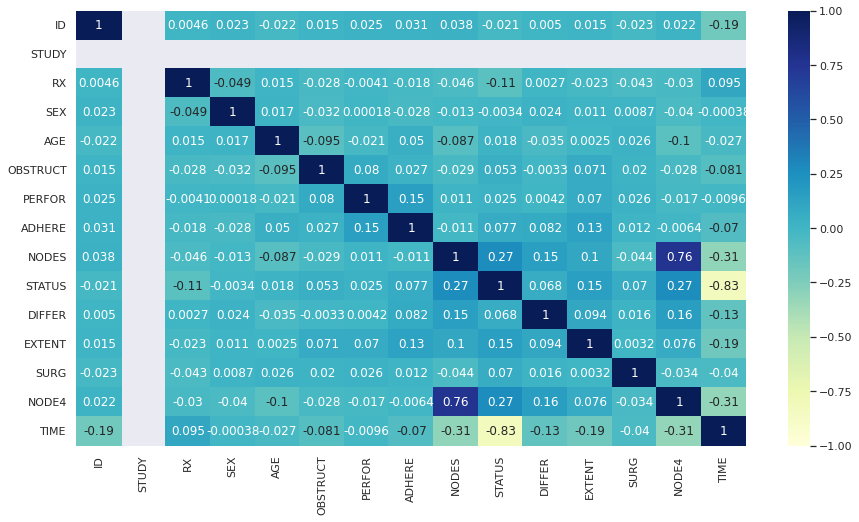

In [23]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(corr,annot=True,vmin=-1,vmax=1,cmap='YlGnBu')

**Dropping "NODE4" column**

In [24]:
data2=data1.drop(['NODE4'],axis=1)
data2.head(5)

,RX,SEX,AGE,OBSTRUCT,PERFOR,ADHERE,NODES,DIFFER,EXTENT,SURG,TIME,STATUS
0,3,1,43,0,0,0,5.0,2.0,3,0,1521,1
1,3,1,63,0,0,0,1.0,2.0,3,0,3087,0
2,1,0,71,0,0,1,7.0,2.0,2,0,963,1
3,3,0,66,1,0,0,6.0,2.0,3,1,293,1
4,1,1,69,0,0,0,22.0,2.0,3,1,659,1


In [25]:
data1.head(5)

,RX,SEX,AGE,OBSTRUCT,PERFOR,ADHERE,NODES,DIFFER,EXTENT,SURG,NODE4,TIME,STATUS
0,3,1,43,0,0,0,5.0,2.0,3,0,1,1521,1
1,3,1,63,0,0,0,1.0,2.0,3,0,0,3087,0
2,1,0,71,0,0,1,7.0,2.0,2,0,1,963,1
3,3,0,66,1,0,0,6.0,2.0,3,1,1,293,1
4,1,1,69,0,0,0,22.0,2.0,3,1,1,659,1


In [26]:
# Determining independent variables
X=data2.iloc[:, 0:11]
# Determining dependent variable
Y=data2[["STATUS"]]

In [27]:
# Splitting the dataset into training and testing sets
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=0)

In [28]:
ada = AdaBoostRegressor()
ada.fit(X_train,Y_train)
Y_pred = ada.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [29]:
print(Y_pred)

[0.3258427  0.40656566 1.         0.94444444 0.05166052 1.
 0.40656566 1.         0.25609756 1.         0.25609756 0.25609756
 0.45180723 0.25609756 0.85714286 0.05166052 1.         0.41082803
 1.         0.40806045 0.95652174 1.         0.40656566 1.
 0.3258427  1.         1.         1.         1.         0.46581197
 0.3258427  0.40806045 1.         1.         0.40656566 0.40806045
 1.         1.         0.26923077 0.40656566 0.25609756 1.
 0.25609756 0.40806045 0.40806045 0.70322581 1.         0.41082803
 1.         0.45180723 0.40806045 0.25609756 0.40656566 0.30769231
 0.25609756 0.40656566 0.41082803 1.         1.         0.2037037
 0.25609756 0.40656566 0.41082803 0.40656566 0.25609756 1.
 1.         1.         0.40806045 0.40656566 1.         0.30769231
 1.         1.         1.         0.25609756 1.         1.
 1.         0.40656566 1.         1.         1.         1.
 1.         1.         1.         1.         0.95652174 1.
 0.40656566 1.         0.05166052 1.         0.40806

In [30]:
def perform_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0
    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==1:
           TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
           FP += 1
        if y_actual[i]==y_hat[i]==0:
           TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
          FN += 1
    return(TP, FP, TN, FN)

In [31]:
a=np.where(Y_test<0.5,0,1)
b=np.where(Y_pred<0.5,0,1)

In [32]:
tp,fp,tn,fn=perform_measure(a,b)
acc=(tp+tn)/(tp+fp+tn+fn)
print("Accuracy: :",acc)

Accuracy: : 0.9324324324324325


In [33]:
from sklearn.metrics import roc_curve

In [34]:
def plot_roc_curve(fpr1,tpr1):
    f = plt.figure()
    f.set_figheight(9)
    f.set_figwidth(20)
    plt.plot(fpr1, tpr1, color='darkorange',label='AdaBoost')
    plt.plot([0, 1], [0, 1], color = 'navy',linestyle= '--' , label='Baseline')
    plt.xlim([0,1])
    plt.xticks(np.arange(0.0,1.01,step=0.05),fontsize=18)
    plt.yticks(fontsize=18)
    plt.xlabel('False Positive Rate',fontsize=18)
    plt.ylabel('True Positive Rate',fontsize=18)
    plt.title('Receiver Operating Characteristic (ROC) Curve',fontsize=20)
    plt.rcParams["legend.fontsize"] = 18
    plt.legend()
    plt.show()

In [35]:
fpr1, tpr1, thresholds = roc_curve(Y_test, Y_pred)

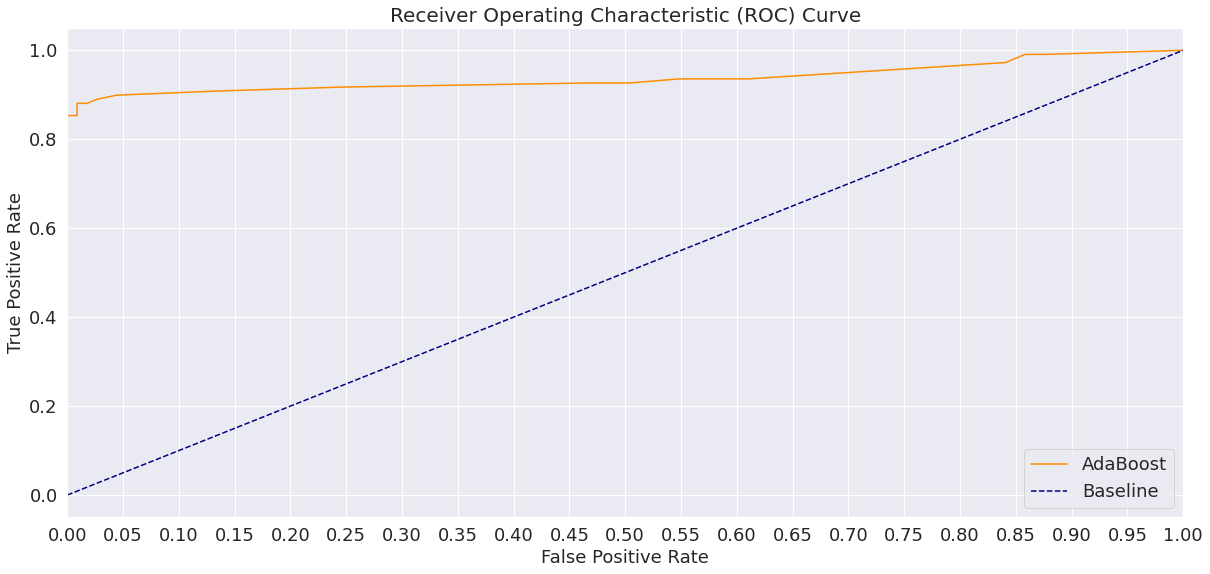

In [36]:
plot_roc_curve(fpr1,tpr1)